# Importação

### Leitura, Tratamento e Análise

In [2]:
# o pandas é usado para ler e manipular os dados da nossa base (o arquivo)
import pandas as pd

# o matplotlib e plotly para mostrar os dados em forma de gráficos
import matplotlib.pyplot as plt
import plotly.express as px

ModuleNotFoundError: No module named 'matplotlib'

# Funções

In [2]:
# Essa função remove o último caractere de uma string se for um determinado caractere
def remove_last_char(string, char):
    if string.endswith(char):
        return string[:-1]
    return 

# Essa função faz o mesmo que o anterior para cada linha de uma coluna de um dataframe
def df_remove_last_char(df, char):
    df_2 = []
    for i in df:
        df_2.append(remove_last_char(i, char))
    return df_2

# Leitura e tratamento do DataFrame

## Leitura

#### Colunas do DataFrame (sem tratamento):
 - id: identificador das pessoas que participaram da pesquisa (número inteiro serial)

 - age: intervalo de idade das pessoas ["Até 15 anos", "16 - 24 Anos", "25 - 29 Anos", "30 - 39 Anos", "40 - 49 Anos", "50 ou mais"]
 
 - gender: gênero que a pessoa se identifica (Masculino, Feminino, Outros/Prefiro não dizer)
 
 - time_in_social_media: intervalo de tempo que a pessoa costuma passar, por dia, usando redes sociais ["Menos que 2h", "Entre 2h e 4h", "Entre 4h e 6h", "Entre 6h e 8h", "Mais que 8h"]
 
 - people_living_together: quantas pessoas (contando com a pessoa) moram em sua casa
 
 - social_class: classe social que a pessoa acha que se encaixa ["Classe baixa", "Classe média baixa", "Classe média", "Classe média alta", "Classe alta", "Prefiro não dizer"]
 
 - has_pets: se a pessoa tem pets ["Sim", "Não"]
 
 - number_of_pets: quantidade de pets que a pessoa tem
 
 - pet_species: espécie(s) de seu(s) pet(s) 
 
 - forgets: se a pessoa costuma esquecer tarefas relacionadas aos seus pets
 
 - report_abandoned: se a pessoa reportaria um cachorro abandonado se o encontrasse ["Não", "Provavelmente não", "Talvez", "Provavelmente sim", "Sim"]
 
 - feeling: como a pessoa se sente ao ver fotos de pets (em uma escala de 0 a 4)
 
 - would_use: resposta se a pessoa usaria uma rede social voltada a pets

In [3]:
df = pd.read_excel('data/data.xlsx')
display(df)

,id,age,gender,time_in_social_media,people_living_together,social_class,has_pets,number_of_pets,pet_species,forgets,report_abandoned,feeling,would_use
0,1,Até 15 anos,Masculino,Entre 2h e 4h,3,Classe média,Não,0,NaN,NaN,NaN,1,Não
1,2,Até 15 anos,Feminino,Entre 2h e 4h,4,Classe média alta,Não,0,NaN,NaN,NaN,2,Não
2,3,Até 15 anos,Masculino,Entre 4h e 6h,4,Classe média alta,Sim,1,"Cachorro,",Mais ou menos,Provavelmente sim,2,Talvez
3,4,16 - 24 anos,Masculino,Menos que 2h,4,Classe média baixa,Sim,1,"Cachorro,",Não,Sim,3,Sim
4,5,Até 15 anos,Masculino,Entre 2h e 4h,4,Classe média alta,Não,0,NaN,NaN,NaN,1,Não
...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,350,40 - 49 anos,Feminino,Entre 2h e 4h,4,Classe média,Sim,2,Outros,Não,Sim,3,Não
350,351,50 ou mais,Feminino,Entre 2h e 4h,2,Classe média,Sim,1,"Cachorro,",Não,Provavelmente sim,3,Sim
351,352,40 - 49 anos,Feminino,Entre 2h e 4h,3,Classe média,Sim,1,"Cachorro,",Sim,Sim,3,Sim
352,353,50 ou mais,Masculino,Menos que 2h,2,Classe média,Não,0,NaN,NaN,NaN,3,Sim


## Tratamento

### Transformando as espécies de pets em listas (já que pode ser mais de uma)

In [4]:
# Substitui os vazios por nenhum
df['pet_species'] = df['pet_species'].fillna('none')

# Remove a virgula do final
df['pet_species'] = df_remove_last_char(df['pet_species'], ',')

# Transforma as strings em listas
df['pet_species'] = df['pet_species'].str.split(',')

df['pet_species'] = df['pet_species'].fillna('[none]')

df['pet_species']

0          [none]
1          [none]
2      [Cachorro]
3      [Cachorro]
4          [none]
          ...    
349        [none]
350    [Cachorro]
351    [Cachorro]
352        [none]
353    [Cachorro]
Name: pet_species, Length: 354, dtype: object

### Transformando as colunas em inteiro

#### Colunas:
 - gender: Masculino = 0, Feminino = 1, outros = 2
 - age: <=15 = 10, <=24 = 20, <=29 = 25, <=39 = 30, <=49 = 40, >=50 = 50
 - time_in_social_media: Menos que 2h = 0, Entre 2h e 4h = 2, Entre 4h e 6h = 4, Entre 6h e 8h = 6, Mais que 8h = 8
 - has_pets: Não = 0, Sim = 1
 - forgets: Não = 0, Todo o resto = 1 (se a pessoa colocou outra coisa como talvez, ou geralmente, consideramos que ela esqueça)
 - would_use: Sim = 1, Todo o resto = 0 (se a pessoa colocou que talvez usaria, consideramos como alguém que não usaria)
 - report_abandoned: Não = 0, Provavelmente Não = 1, Talvez = 2, Provavelmente sim = 3, Sim = 4 (consideramos quem não respondeu como talvez)

In [5]:
## coluna gender
df.loc[~df['gender'].str.strip().isin(['Feminino', 'Masculino']), 'gender'] = 2
df.loc[df['gender'].str.strip() == 'Masculino', 'gender'] = 0
df.loc[df['gender'].str.strip() == 'Feminino', 'gender'] = 1

## coluna age
df.loc[df['age'].str.strip() == 'Até 15 anos', 'age'] = 15
df.loc[df['age'].str.strip() == '16 - 24 anos', 'age'] = 20
df.loc[df['age'].str.strip() == '25 - 29 anos', 'age'] = 25
df.loc[df['age'].str.strip() == '30 - 39 anos', 'age'] = 30
df.loc[df['age'].str.strip() == '40 - 49 anos', 'age'] = 40
df.loc[df['age'].str.strip() == '50 ou mais', 'age'] = 50

## coluna time_in_social_media
### algumas vezes, quando o tempo que a pessoa passa em redes sociais é entre 4h e 6h, a string está com esse problema "\xa0"
df.loc[df['time_in_social_media'] ==  'Entre 4h e 6h\xa0', 'time_in_social_media' ] =  'Entre 4h e 6h'
df.loc[df['time_in_social_media'].str.strip() == 'Menos que 2h', 'time_in_social_media'] = 0
df.loc[df['time_in_social_media'].str.strip() == 'Entre 2h e 4h', 'time_in_social_media'] = 2
df.loc[df['time_in_social_media'].str.strip() == 'Entre 4h e 6h', 'time_in_social_media'] = 4
df.loc[df['time_in_social_media'].str.strip() == 'Entre 6h e 8h', 'time_in_social_media'] = 6
df.loc[df['time_in_social_media'].str.strip() == 'Mais que 8h', 'time_in_social_media'] = 8

## coluna has_pets
df.loc[df['has_pets'].str.strip() == 'Não', 'has_pets'] = 0
df.loc[df['has_pets'].str.strip() == 'Sim', 'has_pets'] = 1

## coluna forgets
df.loc[df['forgets'].str.strip() != 'Não', 'forgets'] = 1
df.loc[df['forgets'].str.strip() == 'Não', 'forgets'] = 0

## coluna would_use
df.loc[df['would_use'].str.strip() == 'Não', 'would_use'] = 0
df.loc[df['would_use'].str.strip() == 'Talvez', 'would_use'] = 0.5
df.loc[df['would_use'].str.strip() == 'Sim', 'would_use'] = 1

## coluna report_abandoned
df.loc[df['report_abandoned'].str.strip() == 'Não', 'report_abandoned'] = 0
df.loc[df['report_abandoned'].str.strip() == 'Provavelmente não', 'report_abandoned'] = 1
df.loc[df['report_abandoned'].str.strip() == 'Talvez', 'report_abandoned'] = 2
df.loc[df['report_abandoned'].str.strip() == 'Provavelmente sim', 'report_abandoned'] = 3
df.loc[df['report_abandoned'].str.strip() == 'Sim', 'report_abandoned'] = 4
df['report_abandoned'] = df['report_abandoned'].fillna(2)

## coluna social_class
### assim como na time_in_social_media, algumas linhas também tem esse erro
df.loc[df['social_class'].str.strip() == 'Classe baixa\xa0', 'social_class'] = 'Classe baixa'
df.loc[df['social_class'].str.strip() == 'Classe média\xa0', 'social_class'] = 'Classe média'
df.loc[df['social_class'].str.strip() == 'Classe média alta\xa0', 'social_class'] = 'Classe média alta'

df.loc[df['social_class'].str.strip() == 'Classe baixa', 'social_class'] = 1
df.loc[df['social_class'].str.strip() == 'Classe média baixa', 'social_class'] = 2
df.loc[df['social_class'].str.strip() == 'Classe média', 'social_class'] = 3
df.loc[df['social_class'].str.strip() == 'Classe média alta', 'social_class'] = 4
df.loc[df['social_class'].str.strip() == 'Classe alta', 'social_class'] = 5
df.loc[df['social_class'].str.strip() == 'Prefiro não dizer', 'social_class'] = 0

C:\Users\guilhermelanzoni-ieg\AppData\Local\Temp\ipykernel_48444\176170887.py:42: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['report_abandoned'] = df['report_abandoned'].fillna(2)


In [6]:
df['social_class'].unique()

array([3, 4, 2, 1, 0, 5], dtype=object)

In [7]:
df.loc[df['pet_species'].apply(lambda species_list: 'Cachorro' not in species_list and 'Gato' not in species_list and 'none' not in species_list and 'Outros' not in species_list)]

,id,age,gender,time_in_social_media,people_living_together,social_class,has_pets,number_of_pets,pet_species,forgets,report_abandoned,feeling,would_use


In [8]:
df['has_dog'] = 0
df.loc[df['pet_species'].apply(lambda species_list: 'Cachorro' in species_list), 'has_dog'] = 1

df['has_cat'] = 0
df.loc[df['pet_species'].apply(lambda species_list: 'Gato' in species_list), 'has_cat'] = 1

df['has_others'] = 0
df.loc[df['pet_species'].apply(lambda species_list: 'Outros' in species_list), 'has_others'] = 1
df = df.drop(columns=['pet_species'])

## reordenando colunas, para colocar a resposta (usaria) no final
df = df[['age', 'gender', 'time_in_social_media', 'people_living_together', 'social_class', 'has_pets', 'number_of_pets', 'has_dog', 'has_cat','has_others', 'forgets', 'report_abandoned', 'feeling', 'would_use',]]
df

,age,gender,time_in_social_media,people_living_together,social_class,has_pets,number_of_pets,has_dog,has_cat,has_others,forgets,report_abandoned,feeling,would_use
0,15,0,2,3,3,0,0,0,0,0,1,2,1,0
1,15,1,2,4,4,0,0,0,0,0,1,2,2,0
2,15,0,4,4,4,1,1,1,0,0,1,3,2,0.5
3,20,0,0,4,2,1,1,1,0,0,0,4,3,1
4,15,0,2,4,4,0,0,0,0,0,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,40,1,2,4,3,1,2,0,0,0,0,4,3,0
350,50,1,2,2,3,1,1,1,0,0,0,3,3,1
351,40,1,2,3,3,1,1,1,0,0,1,4,3,1
352,50,0,0,2,3,0,0,0,0,0,1,2,3,1


### DataFrame tratado

In [9]:
df = df.loc[:, 'age':]
display(df)

,age,gender,time_in_social_media,people_living_together,social_class,has_pets,number_of_pets,has_dog,has_cat,has_others,forgets,report_abandoned,feeling,would_use
0,15,0,2,3,3,0,0,0,0,0,1,2,1,0
1,15,1,2,4,4,0,0,0,0,0,1,2,2,0
2,15,0,4,4,4,1,1,1,0,0,1,3,2,0.5
3,20,0,0,4,2,1,1,1,0,0,0,4,3,1
4,15,0,2,4,4,0,0,0,0,0,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,40,1,2,4,3,1,2,0,0,0,0,4,3,0
350,50,1,2,2,3,1,1,1,0,0,0,3,3,1
351,40,1,2,3,3,1,1,1,0,0,1,4,3,1
352,50,0,0,2,3,0,0,0,0,0,1,2,3,1


In [10]:
df.to_csv('treated_df.csv')

# Análise

In [11]:
fig = px.pie(df, names='would_use')
fig.show()

In [12]:
would_use = df.loc[df['would_use'] == 1]
px.pie(would_use, names='number_of_pets')

In [13]:
# px.histogram(df, x='has_pets', color=9'has_pets')

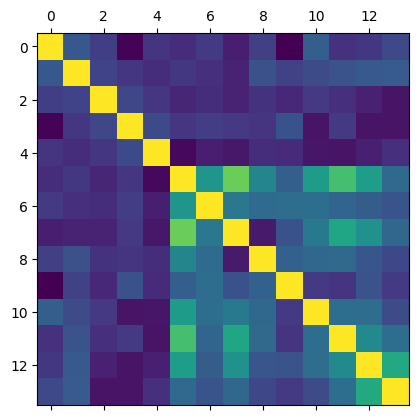

In [14]:
df_numeric = df.copy()
for coluna in df_numeric:
    if df_numeric[coluna].dtype != 'int64':
        df_numeric[coluna] = pd.factorize(df_numeric[coluna])[0]

plt.matshow(df_numeric.corr())

[Text(0.5, 0, 'age'),
 Text(1.5, 0, 'gender'),
 Text(2.5, 0, 'time_in_social_media'),
 Text(3.5, 0, 'people_living_together'),
 Text(4.5, 0, 'social_class'),
 Text(5.5, 0, 'has_pets'),
 Text(6.5, 0, 'number_of_pets'),
 Text(7.5, 0, 'has_dog'),
 Text(8.5, 0, 'has_cat'),
 Text(9.5, 0, 'has_others'),
 Text(10.5, 0, 'forgets'),
 Text(11.5, 0, 'report_abandoned'),
 Text(12.5, 0, 'feeling'),
 Text(13.5, 0, 'would_use')]

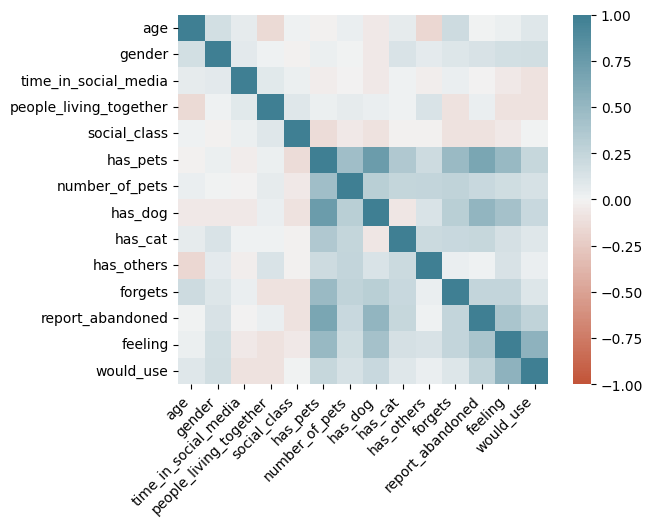

In [15]:
import seaborn as sns
corr = df_numeric.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)